* Unsupervised Learning is a machine learning technique that is performed only if a series of variables such as x1, x2, x3, ... kp are given without any objective variables (or response variable Y) in the data set
* Because there are no objective variables or response variables, the objective is to discover a specific pattern or unknown knowledge from given data instead of making a prediction


>> * Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them 
>> *groups based on color, shape,finds pattern*

>> * Association learning is a rule based machine learning and data mining technique that finds important relations between variables or features in a data set
>> * find the dependencies, for example. when a user orders bread, high chance he orders butter and then milk. So associations or dependencies are calculated. This concepts used in shopping application*

>> * Dimensionality Reduction refers to summarizing a given variable set into smaller numbers of variables for providing effective explanation

**the goal of unsupervised learning is to extract patterns and other new information from a dataset without an explicit input. Three techniques—clustering, association, and dimensionality reduction** 


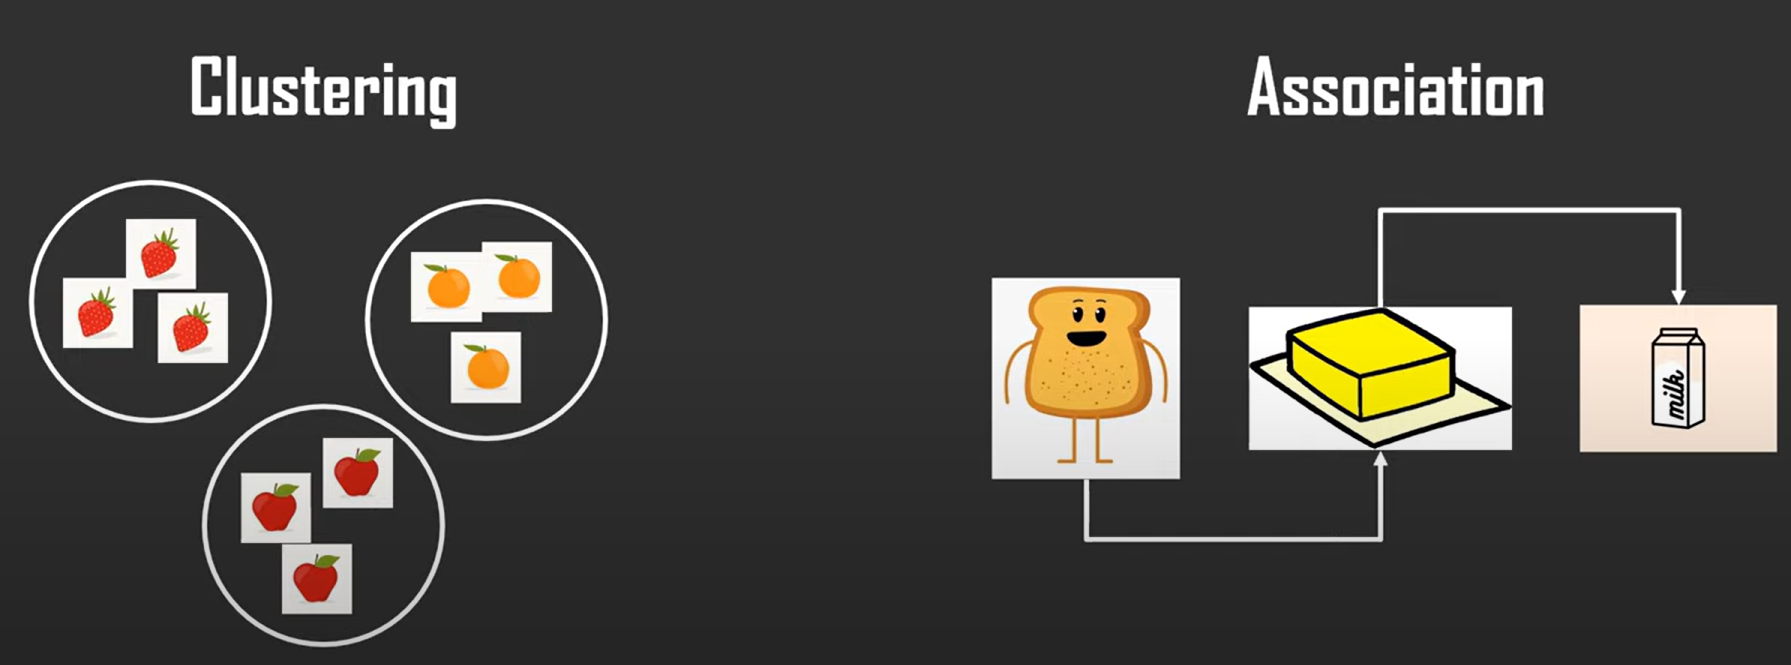

## Clustering Analysis

Clustering is a technique which divides unlabeled and uncategorized data into similar groups based on the given observed values. The main purpose of clustering analysis is to see how the input data forms groups. So, the criteria for grouping of input data are the first thing to consider in clustering analysis, and in general, data is grouped based on the similarity. In other words, the data within the cluster are very similar to each other, but their characteristics are different from those of other clusters

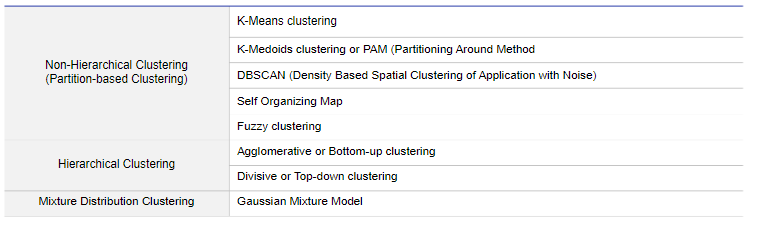

### Hierarchial Clustering

Dendrogram is a part of hierarchial clustering. The distance between two clusters in dendrogram show their similarity /dissimilarity. The close = similarity. 

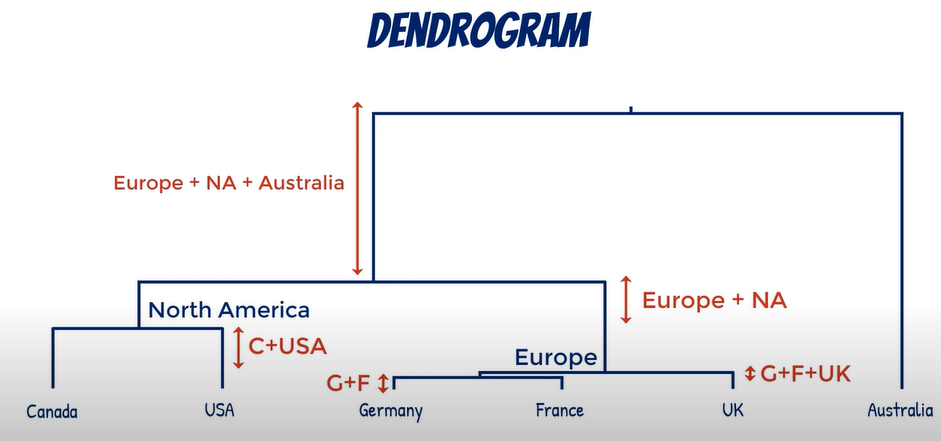

In dendrogram, the line is drawn to decide the number of clusters, The line is drawn when the distance between two stages is very large. No need to preset the number of clusters where in kmeans we need to preset the clusters. That is not in the case of dendrogram. 

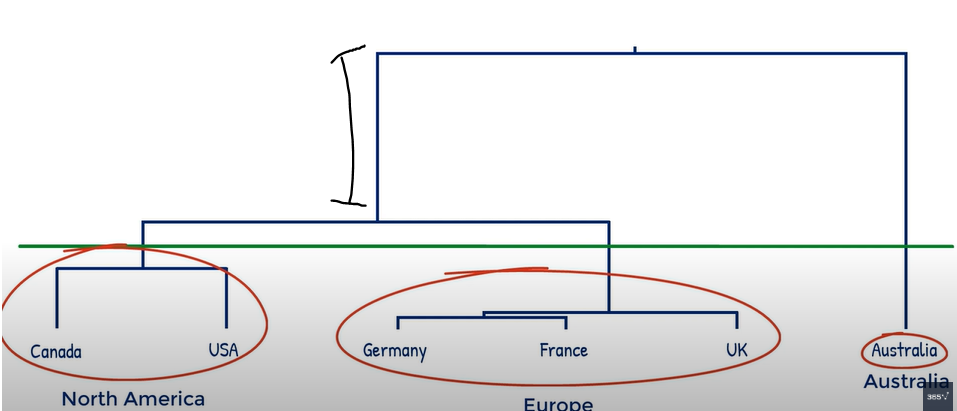

## Non-hierarchial Clustering

#### K means clustering

* In kmeans clustering , we need to set the k values denoting the number of clusters we want. 
* The step of k means is:
  1. Plot the dataset in 2 dimensional, so (xi,xj) are plotted in the 2-dimensional space
  2. Keep 2 centroid or k-points on the 2d and check which datapoints are closer to centroid based on euclidean distance. Closer datapoints are clustered to one group
  3. Then for the second iteration, the centroid is moved and again, the distance is calculated and clustered.
  4. the process is repeated untill the points are closer to the centroids

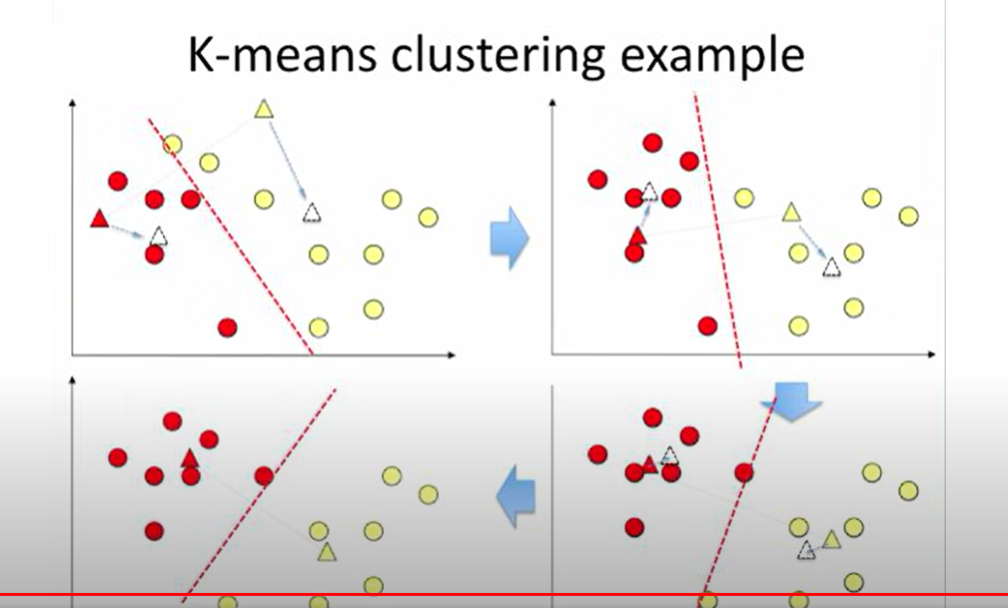

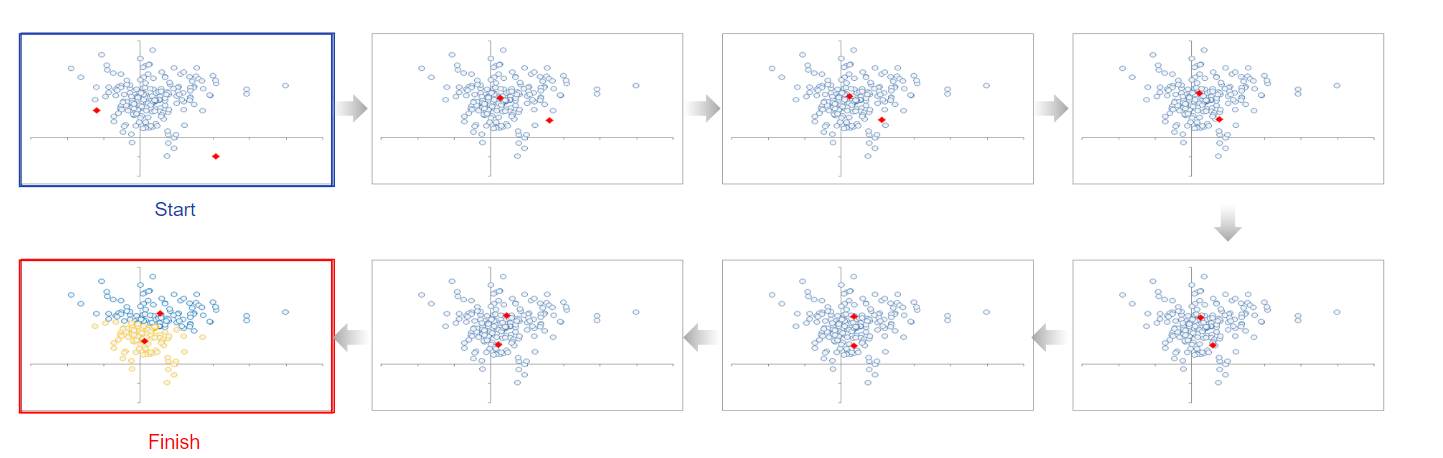

In [3]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [5]:
x,y = make_blobs(n_samples =300, cluster_std = 1.00, random_state=12)


In [8]:
x[0:5]

array([[-9.8799272 ,  9.4489913 ],
       [-7.94627336,  6.01079038],
       [-9.9016536 ,  8.54973764],
       [-7.95444917,  7.59731819],
       [-8.90654995,  8.14521281]])

In [9]:
y[0:5]

array([2, 0, 2, 2, 2])

In [10]:
x.shape

(300, 2)

In [11]:
y.shape

(300,)

In [15]:
x[:5,0]

array([-9.8799272 , -7.94627336, -9.9016536 , -7.95444917, -8.90654995])

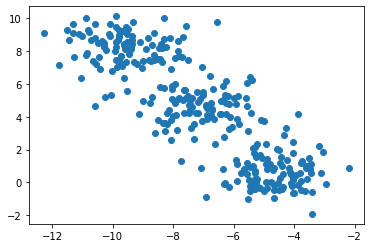

In [16]:
plt.scatter(x[:,0], x[:,1])

##### Finding k through elbow method, so we find the point where curve is drastically dropping the least from the top and name it as number of cluster

C:\Users\e183066\OneDrive - Applied Materials\Documents\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'list_sample')

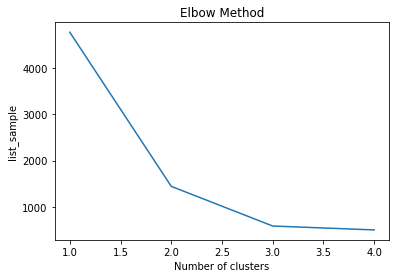

In [21]:
list_sample=[]
for i in range(1,5): #running 10 times
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    list_sample.append(kmeans.inertia_)
plt.plot(range(1,5), list_sample)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('list_sample')


From the above plot, the plot drops at 3, denoting the n_clusters = 3

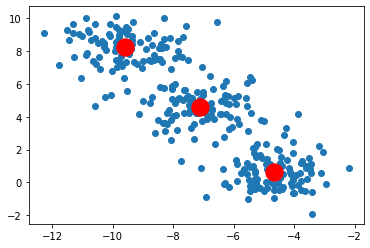

In [25]:
kmeans = KMeans(n_clusters=3)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],cmap ='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')

##### red points denotes the centroid for 3 clusters.

#### K medoids or partition based clustering algo

It is the advanced version of the K-means clustering method, and it uses all types of similarity and dissimilarity measures. K-Medoids clustering is advantageous for noise or outlier processing because it designates the cluster center by using the actual data set values rather than random dots on plane coordinates. 

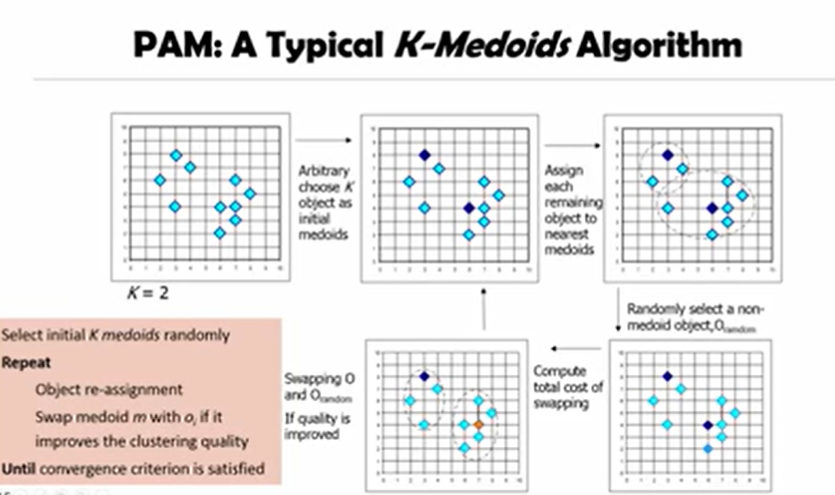

 ***K-MEDOIDS is similar to K-Means just that the k point or centroid keeps changing to make better centroid for clustering. the lesser the cost the centroid is better fit***

#### DBSCAN :

* While the K-means clustering method calculates the average of K-clusters and distances between each data point for clustering, DBSCAN applies density to create a same group of data sets that are linked with constant density

K-means ---> average of k-clusters and distance between each datapoint for clustering

DBSCAN ----> applied density to create same group of data sets, 

**Pros**:

* Can reveal structures that the k-means and hierarchical clustering cannot
* It is a clustering method that is advantageous to identify noise and outlier.  
**Cons** : 
* In other words, it assumes that the data to be included in the same cluster would have high density
* Hyperparameters eps and minPts must be specified
* Hard to get stable clusters in case the dense regions overlap

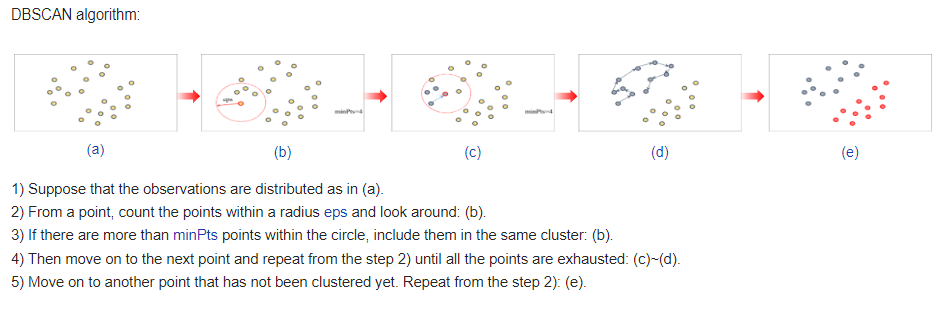

#### Gaussian Mixture Model

#### KNN clsutering

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
x = iris.data
y = iris.target

In [9]:
x.shape

(150, 4)

In [10]:
y.shape

(150,)

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.33,random_state=24)
print("xtrain shape", xtrain.shape)
print("ytrain shape", ytrain.shape)
print("xtest shape", xtest.shape)
print("ytest shape", ytest.shape)

xtrain shape (100, 4)
ytrain shape (100,)
xtest shape (50, 4)
ytest shape (50,)


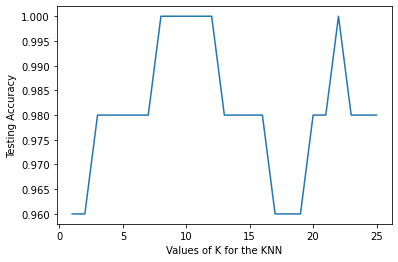

In [14]:
scores = {}
scores_list = []
krange = range(1,26)

for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k) #calling the model
    knn.fit(xtrain,ytrain) #fitting it
    ypred = knn.predict(xtest) #predicting the ypred on xtest
    scores[k] = metrics.accuracy_score(ytest,ypred) #calculating accuracy score for ytest and actual pred
    scores_list.append(metrics.accuracy_score(ytest,ypred)) #append for every k
    
plt.plot(krange, scores_list)
plt.xlabel('Values of K for the KNN')
plt.ylabel('Testing Accuracy')
plt.show()
    

#### Hierarchial Clustering

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [19]:
X = np.array([[5,3],
             [10,15],
             [15,12],
             [24,10],
             [30,30],
             [85,70]])



In [21]:
labels = range(1,11)
labels

range(1, 11)

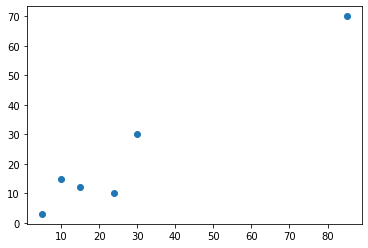

In [23]:
plt.scatter(X[:,0], X[:,1], label = 'True Position')

In [27]:
linked = linkage(X, 'single')


array([[ 1.        ,  2.        ,  5.83095189,  2.        ],
       [ 3.        ,  6.        ,  9.21954446,  3.        ],
       [ 0.        ,  7.        , 13.        ,  4.        ],
       [ 4.        ,  8.        , 20.88061302,  5.        ],
       [ 5.        ,  9.        , 68.00735254,  6.        ]])

In [30]:
labellist = range(1,11)
labellist

range(1, 11)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [26.25, 26.25, 45.0, 45.0],
  [35.625, 35.625, 55.0, 55.0]],
 'dcoord': [[0.0, 5.830951894845301, 5.830951894845301, 0.0],
  [5.830951894845301, 9.219544457292887, 9.219544457292887, 0.0],
  [9.219544457292887, 13.0, 13.0, 0.0],
  [13.0, 20.8806130178211, 20.8806130178211, 0.0],
  [20.8806130178211, 68.00735254367721, 68.00735254367721, 0.0]],
 'ivl': ['2', '1', '3', '0', '4', '5'],
 'leaves': [2, 1, 3, 0, 4, 5],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C1', 'C1', 'C0']}

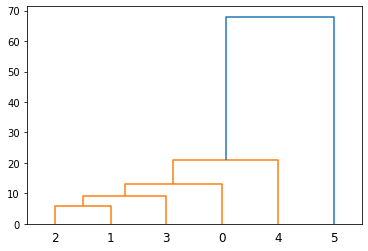

In [33]:
dendrogram(linked, orientation ='top', distance_sort ='descending', show_leaf_counts = True)